In [3]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

In [4]:
df=pd.read_csv("fcc-forum-pageviews.csv",index_col="date")
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [5]:
lowerb=df['value'].quantile(0.025)
upperb=df['value'].quantile(0.975)

In [6]:

df.index = pd.to_datetime(df.index)
df=df[(df['value']>=lowerb) & (df['value']<=upperb)]  #### Pages Views were in the top 2.5% of the dataset and in  bottom 2.5% of the dataset
start_date = '2016-07-01'
end_date = '2020-01'

df = df[(df.index >= start_date) & (df.index <= end_date)]
df.head()

,value
date,
2016-07-01,28372
2016-07-02,26393
2016-07-03,27011
2016-07-04,24236
2016-07-05,23843


In [8]:
df['Year']=df.index.year
df['Month']=df.index.strftime('%B')
df['Day']=df.index.day
df.head()

,value,Year,Month,Day
date,,,,
2016-07-01,28372,2016,July,1
2016-07-02,26393,2016,July,2
2016-07-03,27011,2016,July,3
2016-07-04,24236,2016,July,4
2016-07-05,23843,2016,July,5


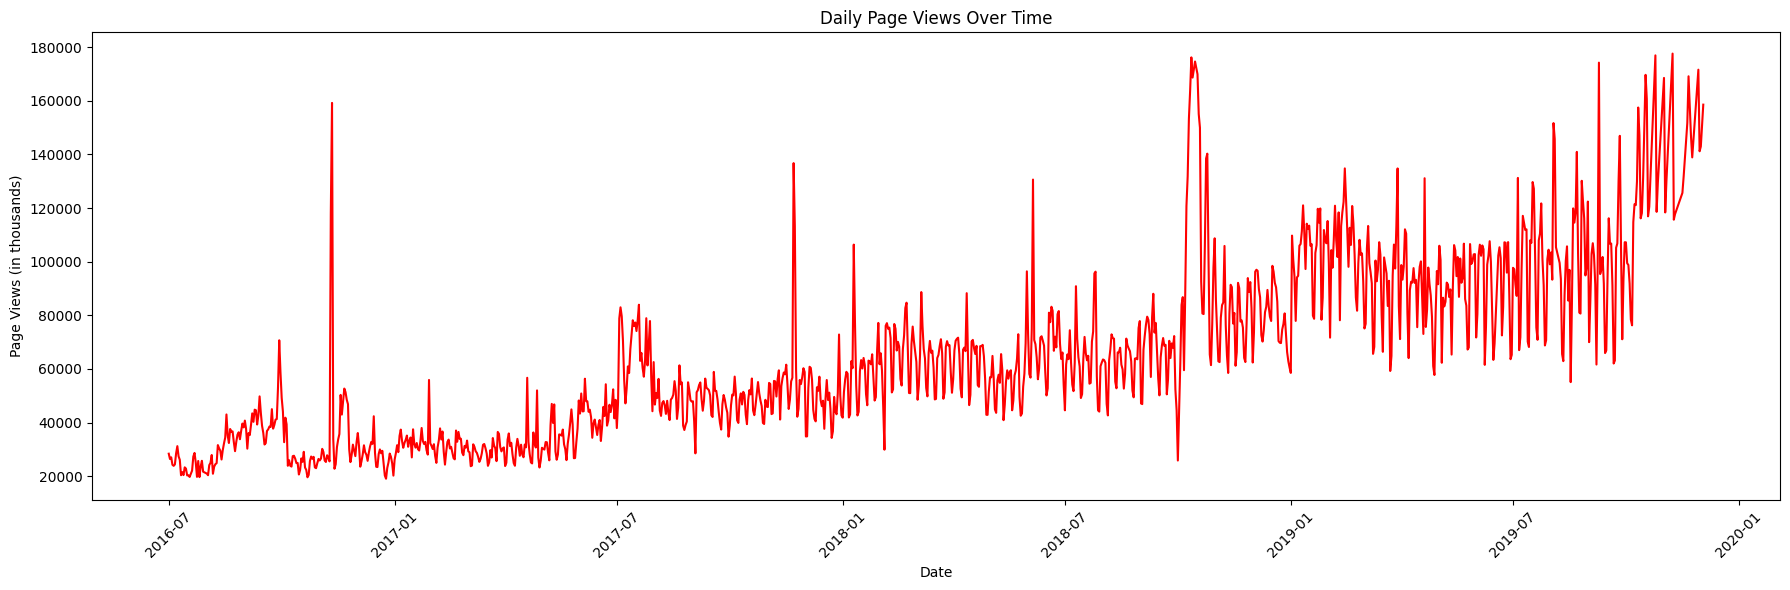

In [9]:
plt.figure(figsize=(18, 6))  

plt.plot(df.index,df['value'], color='red')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: int(x)))
plt.ylabel('Page Views (in thousands)')
plt.title('Daily Page Views Over Time')
plt.tight_layout() 
plt.show()


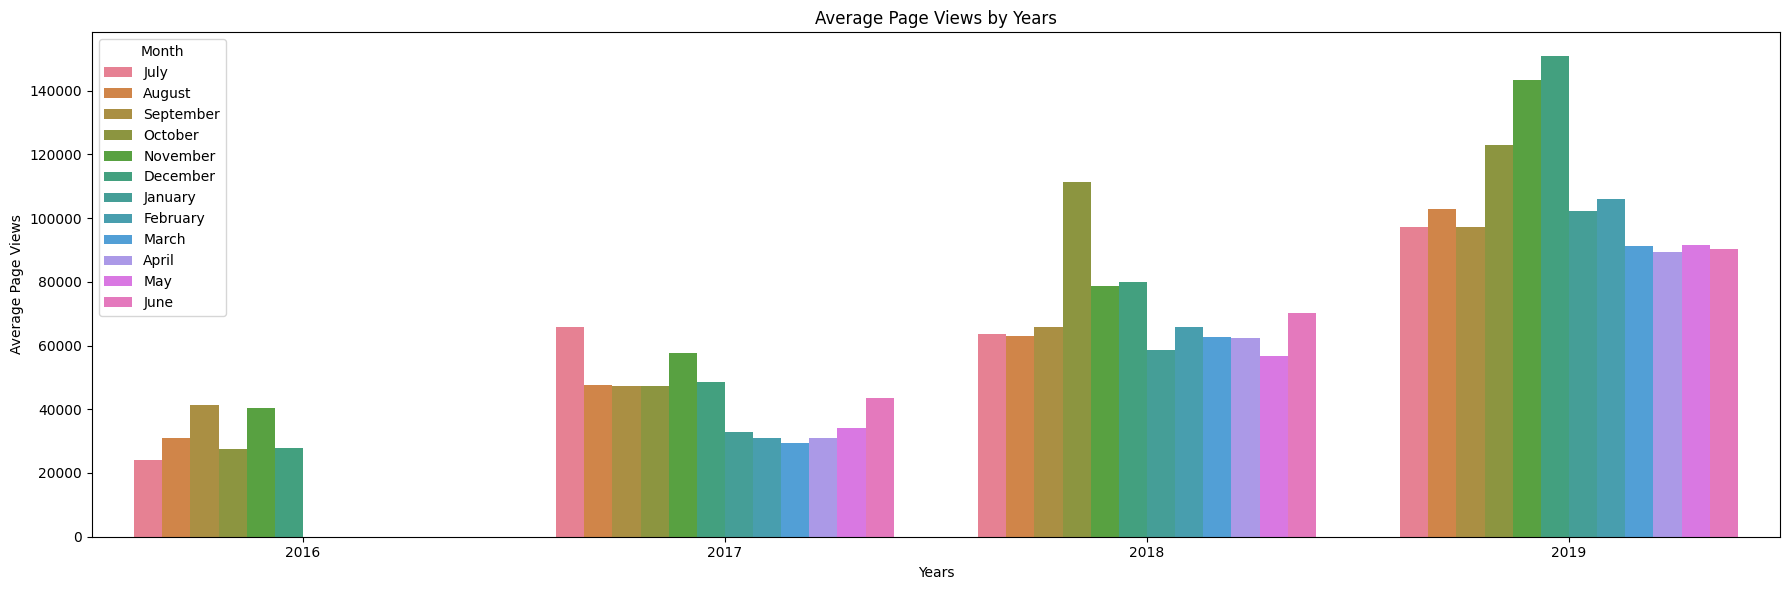

In [19]:
plt.figure(figsize=(18, 6))  

sns.barplot(x='Year', y='value',hue='Month', data=df, estimator='mean',errorbar=None)
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.title('Average Page Views by Years')
plt.tight_layout() 
plt.show()


C:\Users\msouh\AppData\Local\Temp\ipykernel_29868\1789334814.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='value', data=df,palette='husl')


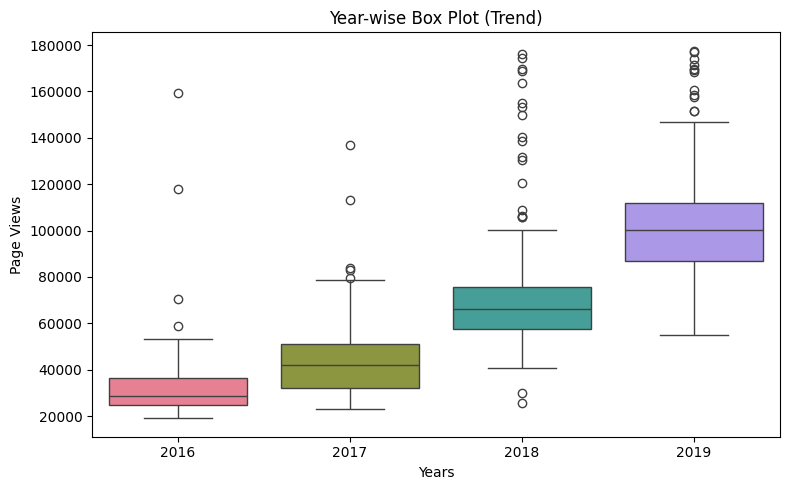

In [34]:
plt.figure(figsize=(8, 5))  

sns.boxplot(x='Year', y='value', data=df,palette='husl')
plt.xlabel('Years')
plt.ylabel('Page Views')
plt.title('Year-wise Box Plot (Trend)')
plt.tight_layout() 
plt.show()


C:\Users\msouh\AppData\Local\Temp\ipykernel_29868\2461920241.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='value', data=df,palette='husl')


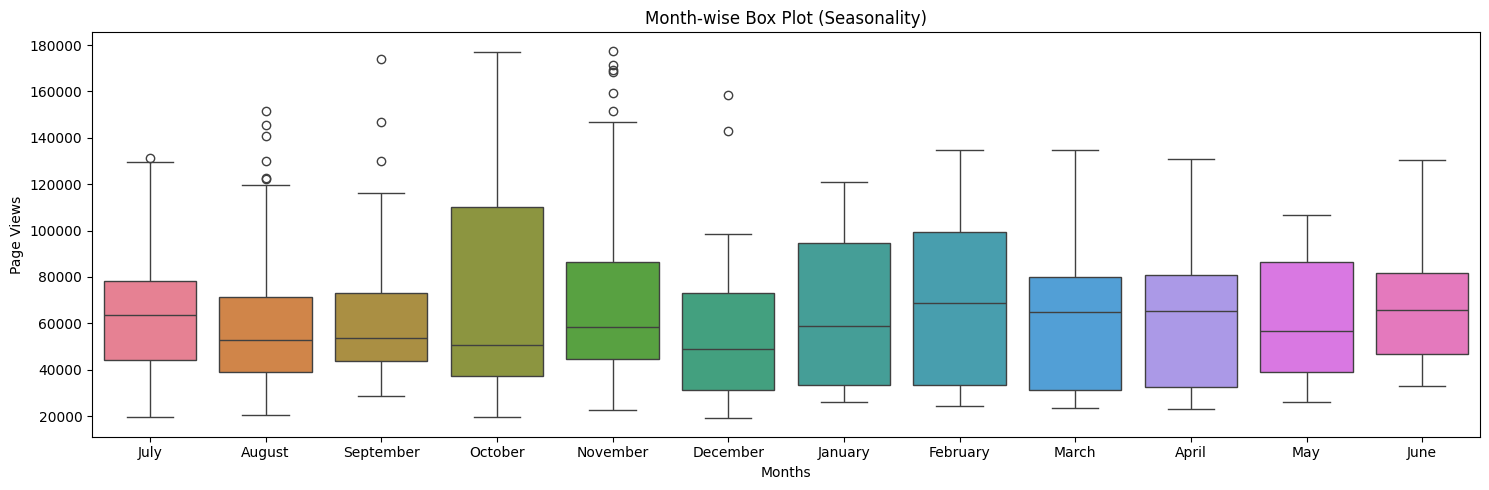

In [35]:
plt.figure(figsize=(15, 5))  

sns.boxplot(x='Month', y='value', data=df,palette='husl')
plt.xlabel('Months')
plt.ylabel('Page Views')
plt.title('Month-wise Box Plot (Seasonality)')
plt.tight_layout() 
plt.show()
